# 1.10. Decision Trees
Decision Trees (DTs) are a **non-parametric supervised learning** method used for **classification** and **regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

## 1.10.1. Classification

In [2]:
from sklearn import tree
X = [[0,0], [1,1]]
Y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [3]:
clf.predict([[2,2]])

array([1])

In [4]:
clf.predict_proba([[2,2]])

array([[ 0.,  1.]])

In [5]:
X = [[0,0], [1,1], [2,2]]
Y = [0,1,2]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [6]:
clf.predict([[2,2]])

array([2])

In [7]:
clf.predict_proba([[2,2]])

array([[ 0.,  0.,  1.]])

In [8]:
X = [[0,0], [1,1], [5,2]]
Y = [0,1,2]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [9]:
clf.predict([[2,2]])

array([1])

In [10]:
clf.predict_proba([[2,2]])

array([[ 0.,  1.,  0.]])

### Iris example

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

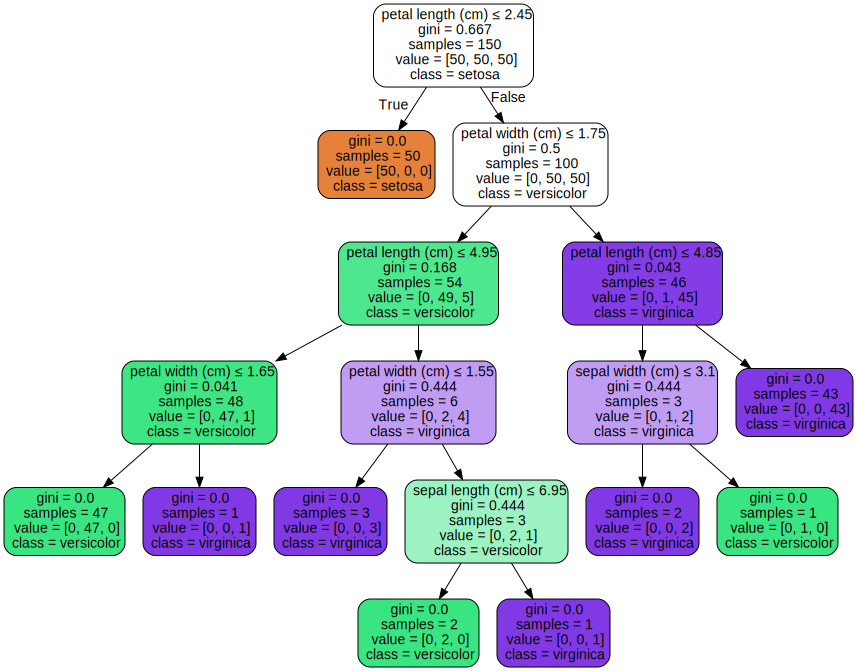

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                 feature_names=iris.feature_names,  
                                 class_names=iris.target_names,  
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [15]:
iris.data[:1, :]

array([[ 5.1,  3.5,  1.4,  0.2]])

In [16]:
clf.predict(iris.data[:1, :])

array([0])

In [17]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

## Plot the decision surface of a decision tree on the iris dataset

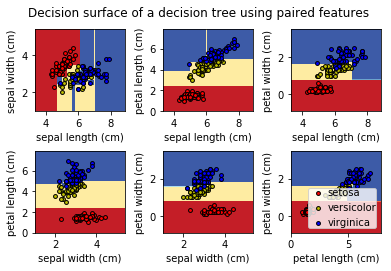

In [18]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                [1, 2], [1, 3], [2, 3]]):
#     print(pairidx, pair)
    
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
#     print(X)
#     print(y)

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                    label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 1.10.2. Regression

In [19]:
from sklearn import tree
X = [[0,0], [2,2]]
y = [0.5,2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf.predict([[1,1]])

array([ 0.5])

## Decision Tree Regression

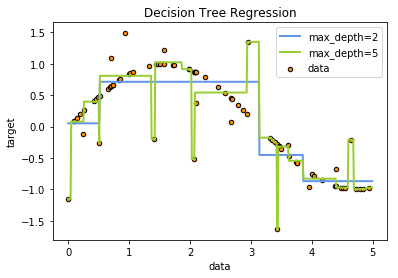

In [20]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", 
         label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()